<a href="https://colab.research.google.com/github/Nik211885/machine_learning_quatity_water/blob/main/logistic_regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

In [333]:
df = pd.read_csv('water_potability.csv')

In [334]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [335]:
def linear(w,b,x):
  return np.dot(w,x) +b

In [336]:
def sigmoid(w,b,x):
  return 1/(1+exp(-(linear(w,b,x))))

In [337]:
def loss_funtion(w,b,x,y):
  loss=0
  m = x.shape[0]
  for i in range(m):
    sig = sigmoid(w,b,x[i])
    loss += -((y[i]*np.log(sig))+(1-y[i])*np.log(1-sig))
  return loss/2*m

#Processing Data

In [338]:
#Xem cac gia tri bi Nan
print('So du lieu chua xac dinh')
for label in df.columns[:-1]:
  print(f'{label}: {df[label].isnull().sum()}')

So du lieu chua xac dinh
ph: 491
Hardness: 0
Solids: 0
Chloramines: 0
Sulfate: 781
Conductivity: 0
Organic_carbon: 0
Trihalomethanes: 162
Turbidity: 0


In [339]:
# thay cac gia tri nan bang gia tri trung binh cot
for label in df.columns[:-1]:
  x_tb = df[label].mean()
  if(df[label].isnull().sum()!=0):
    df[label] = df[label].fillna(x_tb)

In [74]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [340]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,train_size=.7,random_state=50)

In [79]:
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2105,4.229225,207.669229,21214.370515,6.844548,304.275125,488.455862,13.489424,65.307570,3.733140,0
494,7.080795,162.626287,21318.961685,7.575279,289.208408,457.811556,7.477315,60.238478,4.514982,0
2003,7.880686,226.003844,19486.881839,6.208574,356.338079,472.369094,11.995239,55.029166,3.579984,1
371,5.966000,194.796221,17350.058531,4.466577,404.609982,406.806302,11.539987,48.173359,4.177139,1
1887,9.678051,188.368741,26402.703957,4.074141,395.904208,325.001116,16.917994,91.416880,3.029700,0


In [ ]:
#danh gia du lieu
for label in df.columns[:-1]:
  plt.hist(df[df['Potability'] == 0][label], label = 'Not Drink', alpha =0.7,density=True)
  plt.hist(df[df['Potability'] == 1][label], label = 'Have Drink', alpha =0.7,density = True)
  plt.xlabel(label)
  plt.ylabel('Density')
  plt.legend
  plt.show()

In [341]:
#scale data
def scale_data(x):
  scaler = []
  for i in range(x.shape[1]):
    xtb =np.average(x[:,i])
    std = np.std(x[:,i])
    scaler.append({'average':xtb,'standard ':std})
    x[:,i] = (x[:,i] - xtb)/std
  return [x,scaler]

In [263]:
X_train = np.array(train[train.columns[:-1]])
y_train = np.array(train[train.columns[-1]]).reshape(-1,1)

In [264]:
X_train, scaler = scale_data(X_train)

In [342]:
np.max(X_train)

4.7033000255000434

In [343]:
scaler

[{'average': 7.085076169263963, 'standard ': 1.4702280937310304},
 {'average': 195.976016979664, 'standard ': 32.50520182926505},
 {'average': 21967.641554176098, 'standard ': 8756.437565640574},
 {'average': 7.131168139933786, 'standard ': 1.587736261983618},
 {'average': 334.1899441999459, 'standard ': 36.554385336683886},
 {'average': 425.24040812053494, 'standard ': 80.30303423407761},
 {'average': 14.290476612728673, 'standard ': 3.2920013198296187},
 {'average': 66.21049465625755, 'standard ': 15.739744019605242},
 {'average': 3.9637566690486716, 'standard ': 0.7743044233342105}]

In [346]:
def gradient(w,b,x,y):
  m, n = x.shape
  grd_w = np.zeros(n)
  grd_b = 0
  for j in range(n):
    for i in range(m):
      if(j==0):
        grd_b = (sigmoid(w,b,x[i]) - y[i])
      grd_w[j] += (sigmoid(w,b,x[i]) - y[i]) * x[i,j]
  return [grd_w/m ,grd_b/m]

In [347]:
def _learning_rate(w,b,x,y,lr = 0.01):
  check = False
  cost = loss_funtion(w,b,x,y)
  grd_w ,grd_b = gradient(w,b,x,y)
  while(True):
    tmp_w = w.copy()
    tmp_b = b
    for i in range(grd_w.size):
      tmp_w[i] -= lr*grd_w[i]
    tmp_b -= lr*grd_b
    if(loss_funtion(tmp_w,tmp_b,x,y) > cost):
      check = True
      lr = lr /10
    elif(not check):
      lr = lr *10
    else:
      return lr

In [348]:

def gradient_descent(w,b,x,y,learning_rate=0.01):
  grd_w, grd_b = gradient(w,b,x,y)
  for i in  range(w.size):
    w[i] -= learning_rate*grd_w[i]
  b -= learning_rate*grd_b
  return w,b

In [364]:
def sigmoid_regrssion_model(x,y,learning_rate=0.01):
  w = np.zeros(x.shape[1])
  b=0
  loss=[loss_funtion(w,b,x,y)]
  lr = _learning_rate(w,b,x,y,lr = learning_rate)
  for _ in range(2000):
    w,b = gradient_descent(w,b,x,y,learning_rate=lr)
    loss.append(loss_funtion(w,b,x,y))
    if(loss[_] - loss[_+1] <=0.0001):
      break
  return [w,b,loss]


In [365]:
w, b, loss = sigmoid_regrssion_model(X_train,y_train)

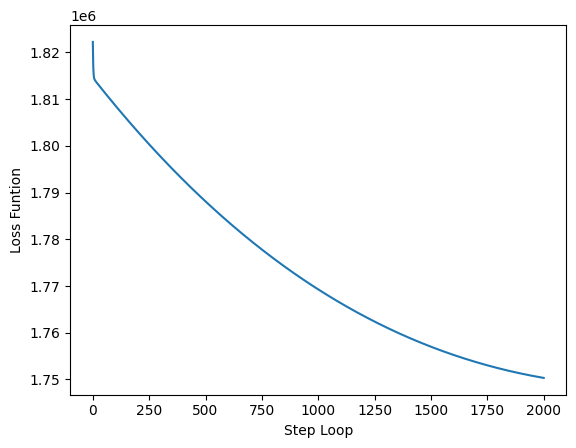

In [366]:
plt.plot(np.arange(len(loss)),loss)
plt.xlabel('Step Loop')
plt.ylabel('Loss Funtion')
plt.show()

In [367]:
w

array([ 0.01248039, -0.06525885,  0.0867988 ,  0.08417932, -0.05254972,
       -0.00172999, -0.02877894,  0.01346122, -0.03990489])

In [368]:
b

array([-0.37720164])

In [369]:
X_test = np.array(test[test.columns[:-1]])
y_test = np.array(test[test.columns[-1]]).reshape(-1,1)

In [370]:
for i in range(X_test.shape[1]):
    X_test[:,i] = (X_test[:,i] - scaler[i]['average'])/scaler[i]['standard ']

In [371]:
scaler

[{'average': 7.085076169263963, 'standard ': 1.4702280937310304},
 {'average': 195.976016979664, 'standard ': 32.50520182926505},
 {'average': 21967.641554176098, 'standard ': 8756.437565640574},
 {'average': 7.131168139933786, 'standard ': 1.587736261983618},
 {'average': 334.1899441999459, 'standard ': 36.554385336683886},
 {'average': 425.24040812053494, 'standard ': 80.30303423407761},
 {'average': 14.290476612728673, 'standard ': 3.2920013198296187},
 {'average': 66.21049465625755, 'standard ': 15.739744019605242},
 {'average': 3.9637566690486716, 'standard ': 0.7743044233342105}]

In [372]:
y_pred=[]
for i in range(y_test.size):
  y_pred.append(sigmoid(w,b,X_test[i]))

In [373]:
y_pred =np.array(y_pred)

In [374]:
y_pred = y_pred>0.5

In [375]:
y_pred = y_pred.astype(int)

In [ ]:
y_test.reshape(1,len(y_test))

In [378]:
count =0
for i in range(y_test.size):
  if(y_test[i] == y_pred[i]):
    count +=1

In [379]:
count/y_test.size

0.6154628687690743